# Eperiment 4

- find the global best model for the dataset


In [23]:
import pandas as pd 
import numpy as np

In [24]:
exp1_df=pd.read_csv("../result/exp1.csv")
exp2_df=pd.read_csv("../result/exp2.csv")
exp3_df=pd.read_csv("../result/exp3.csv")


In [25]:
exp2_df['normalisation']='standard'
exp3_df['normalisation']='standard'
exp1_df['model']+="_exp_1"
exp2_df['model']+="_exp_2"
exp3_df['model']+="_exp_3"





In [26]:
exp=pd.concat((exp1_df,exp2_df,exp3_df))

In [27]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1


In [28]:
exp[exp.auc==exp.auc.max()]

,model,accuracy,auc,f1_score,cm,training_time(ms),testing_time(ms),normalisation
1,RandomForestClassifier_exp_2,0.902174,0.901323,0.915094,[[69 8]\n [10 97]],501.249552,12.759209,standard
0,VotingClassifier_exp_3,0.902174,0.901323,0.915094,[[69 8]\n [10 97]],1435.523987,29.400349,standard


In [29]:
exp[exp['training_time(ms)']==exp['training_time(ms)'].max()]

,model,accuracy,auc,f1_score,cm,training_time(ms),testing_time(ms),normalisation
1,StackingClassifier_exp_3,0.880435,0.87717,0.897196,[[66 11]\n [11 96]],4981.812954,40.835619,standard


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

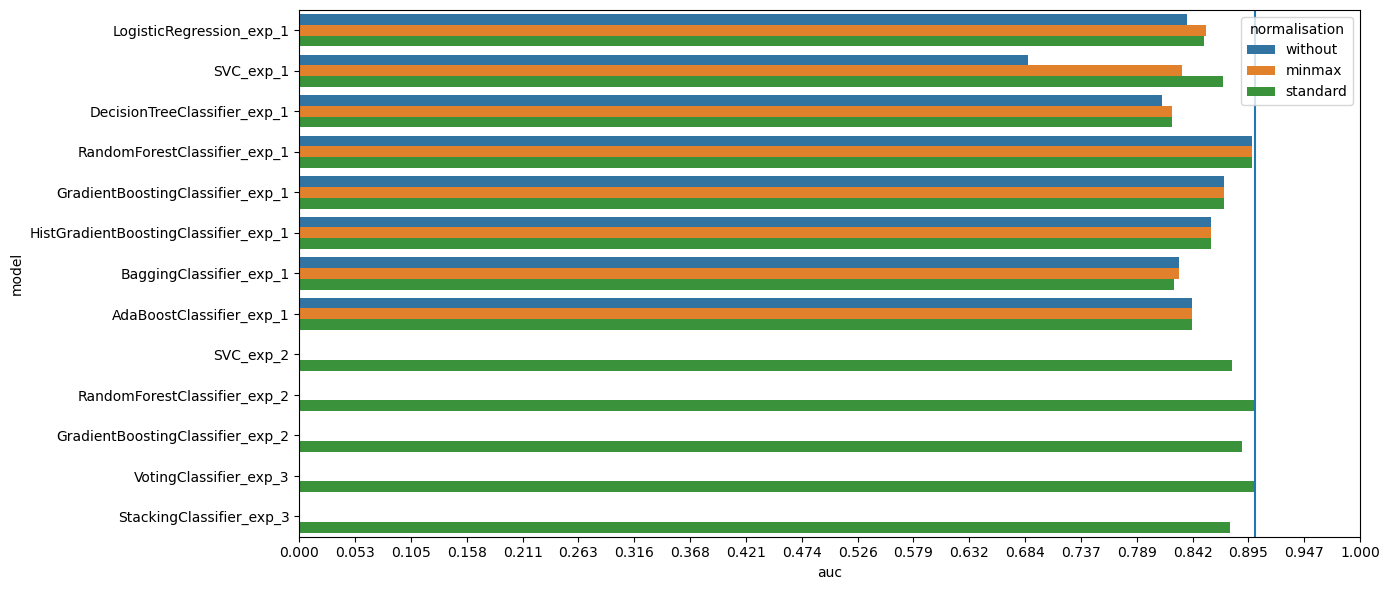

In [31]:
plt.figure(figsize=(14,6))
sns.barplot(exp,y='model',x='auc',orient='h',errorbar=None,hue='normalisation')
plt.xticks(np.linspace(0,1,20))
plt.axvline(x=exp['auc'].max())
plt.tight_layout()
plt.show()


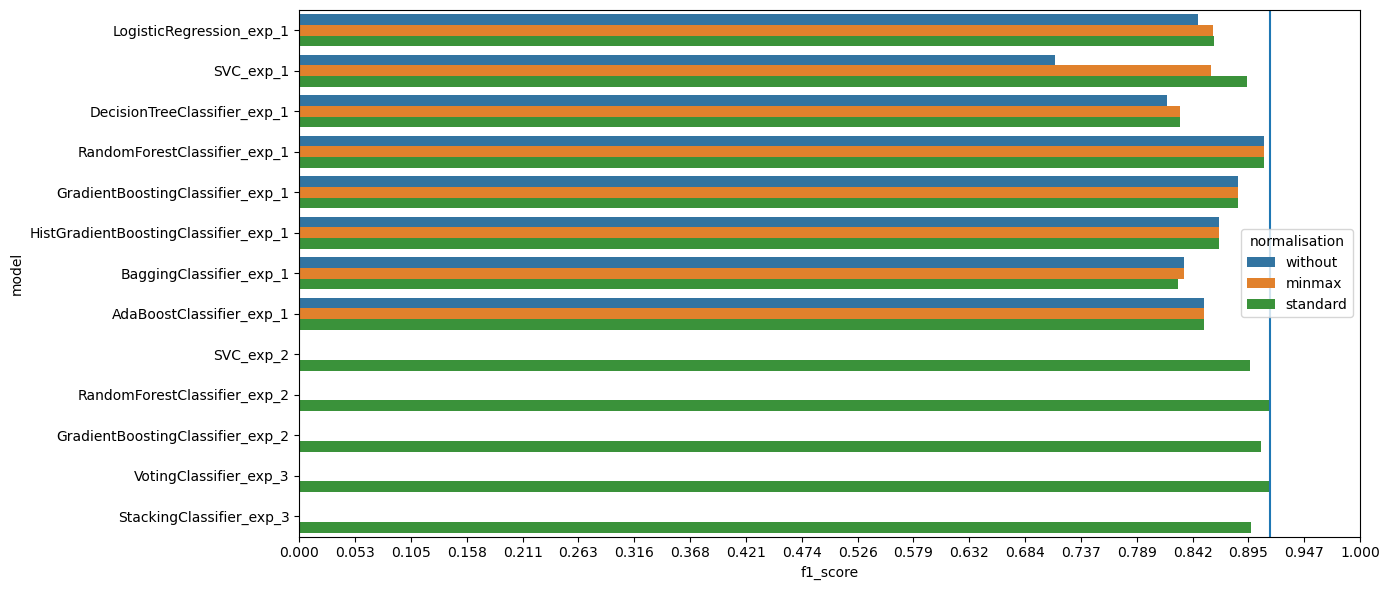

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(exp,y='model',x='f1_score',orient='h',errorbar=None,hue='normalisation',)
plt.xticks(np.linspace(0,1,20))
plt.axvline(x=exp['f1_score'].max())
plt.tight_layout()
plt.show()

In [33]:
best_models=exp[exp.auc==exp.auc.max()]

In [34]:
best_models

,model,accuracy,auc,f1_score,cm,training_time(ms),testing_time(ms),normalisation
1,RandomForestClassifier_exp_2,0.902174,0.901323,0.915094,[[69 8]\n [10 97]],501.249552,12.759209,standard
0,VotingClassifier_exp_3,0.902174,0.901323,0.915094,[[69 8]\n [10 97]],1435.523987,29.400349,standard


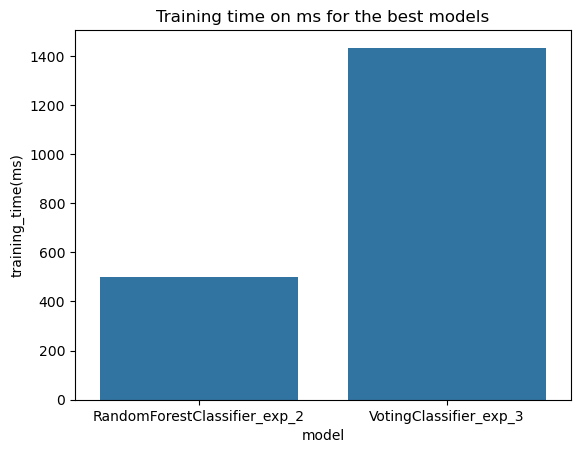

In [35]:
plt.title("Training time on ms for the best models")
sns.barplot(best_models,y='training_time(ms)',x='model');


## best model


- Random Forest


In [36]:
from sklearn.ensemble import RandomForestClassifier
import json
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


In [37]:
df=pd.read_csv('../data/cleaned_data.csv')
X_train,X_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df.target,test_size=0.2,random_state=42)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=scaler.get_feature_names_out())
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=scaler.get_feature_names_out())


In [38]:
with open('../result/rfc_best_hyperparameters.json') as f :
    rfc_best_params=json.load(f)

In [39]:
rfc = RandomForestClassifier(**rfc_best_params).fit(X_train,y_train)

In [40]:
features_importances=pd.DataFrame({
    'features':X_train.columns,
    'importance':rfc.feature_importances_
})

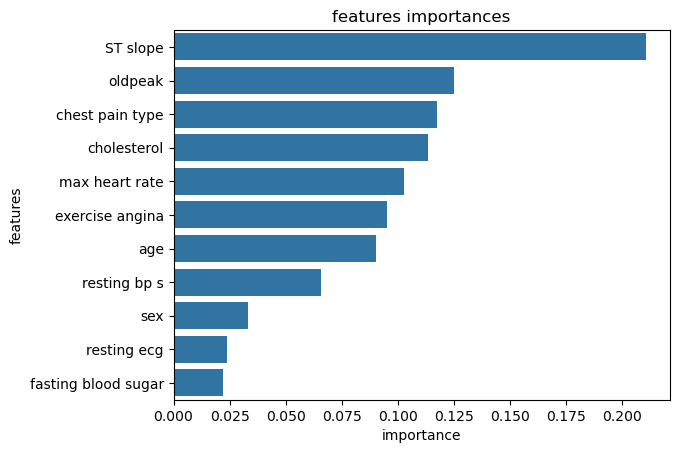

In [48]:
sns.barplot(features_importances.sort_values(by='importance',ascending=False),x='importance',y='features')
plt.title("features importances");